# Magnitude Pruning for Model Compression

This notebook demonstrates magnitude pruning on a neural network trained for regression. We:
1. Generate synthetic data.
2. Train a neural network.
3. Prune weights based on magnitude to achieve 80% sparsity.
4. Fine-tune the pruned model.
5. Compare performance and visualize weight distributions.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

## Generate synthetic data

In [2]:
np.random.seed(0)
n_samples = 1000
X = np.random.uniform(-3, 3, size=(n_samples, 1))
y = np.sin(X).ravel() + 0.1 * np.random.randn(n_samples)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train original model and evaluate

In [3]:
# Train original model
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',
                     solver='adam', max_iter=1000, random_state=0)
model.fit(X_train, y_train)

# Evaluate original model
y_pred = model.predict(X_test)
original_mse = mean_squared_error(y_test, y_pred)
print(f"Original Test MSE: {original_mse:.2f}")

Original Test MSE: 0.01


## Extract weights

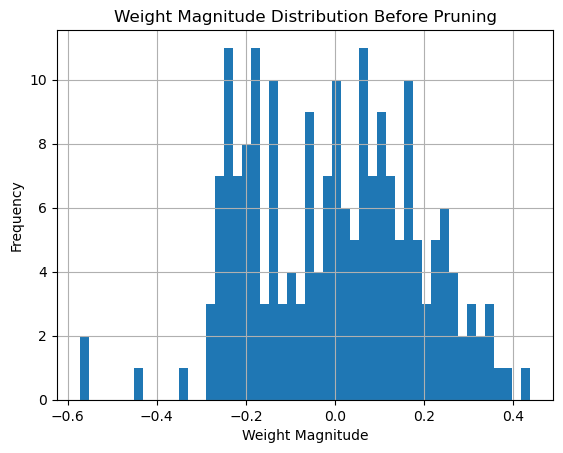

In [4]:
weights = np.concatenate([coef.flatten() for coef in model.coefs_])

# Plot weight distribution before pruning
plt.hist(weights, bins=50)
plt.title("Weight Magnitude Distribution Before Pruning")
plt.xlabel("Weight Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Prune weights to achieve 80% sparsity

In [5]:
# Prune weights to achieve 80% sparsity
sparsity = 0.8
threshold = np.percentile(np.abs(weights), sparsity * 100)

# Apply mask and prune weights
pruned_coefs = []
for coef in model.coefs_:
    mask = np.abs(coef) >= threshold
    pruned_coef = coef * mask
    pruned_coefs.append(pruned_coef)

# Replace weights in model
model.coefs_ = pruned_coefs

## Extract pruned weights

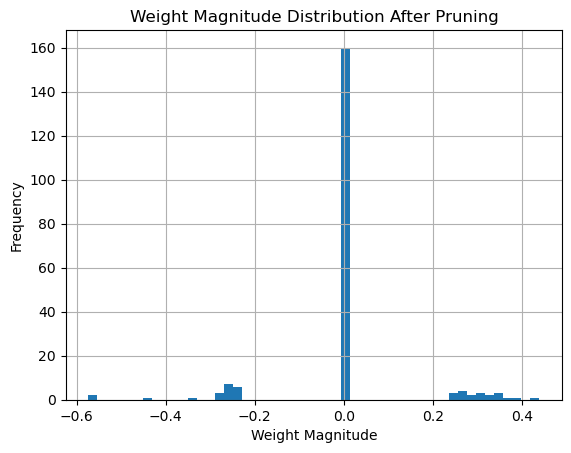

Actual Sparsity: 80.00%


In [6]:
# Extract pruned weights
pruned_weights = np.concatenate([coef.flatten() for coef in model.coefs_])

# Plot weight distribution after pruning
plt.hist(pruned_weights, bins=50)
plt.title("Weight Magnitude Distribution After Pruning")
plt.xlabel("Weight Magnitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Calculate actual sparsity
nonzero = np.count_nonzero(pruned_weights)
total = pruned_weights.size
actual_sparsity = 1 - nonzero / total
print(f"Actual Sparsity: {actual_sparsity:.2%}")

## Fine-tuning the pruned model

In [7]:
# Fine-tune pruned model
model.max_iter = 500
model.fit(X_train, y_train)

# Evaluate pruned model
y_pruned_pred = model.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pruned_pred)
print(f"Pruned Test MSE: {pruned_mse:.2f}")

Pruned Test MSE: 0.01


## Compare performance

In [8]:
print(f"Original Test MSE: {original_mse:.2f}")
print(f"Pruned Test MSE: {pruned_mse:.2f}")
print(f"Accuracy Drop: {pruned_mse - original_mse:.2f}")

Original Test MSE: 0.01
Pruned Test MSE: 0.01
Accuracy Drop: 0.00
